In [2]:
# importing dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
dataWine = pd.read_csv('winequality-red.csv')

In [4]:
dataWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [11]:
# creating data
X = np.array(dataWine.iloc[:][['fixed acidity']])


y = np.array(dataWine.iloc[:][['quality']])


y = y.astype(float)

print("X = "+ str(len(X)) +" | Y = "+str(len(y)))

mean = X

cov = y

print("mean = "+ str(len(mean)) +" | cov = "+str(len(cov)))

#data = np.random.multivariate_normal(mean, cov, 8000) 
#data

y

X = 27 | Y = 27
mean = 27 | cov = 27


array([[5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [7.],
       [7.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [7.],
       [5.],
       [4.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.]])

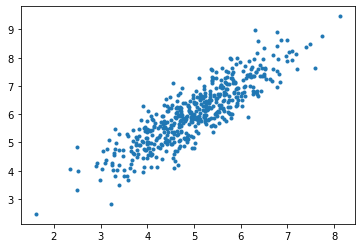

In [28]:
# visualising data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 

In [29]:
# train-test-split 
data = np.hstack((np.ones((data.shape[0], 1)), data)) 

In [30]:
split_factor = 0.90
split = int(split_factor * data.shape[0]) 

In [31]:
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))

In [32]:
print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0])) 

Number of examples in training set =  7200
Number of examples in testing set =  800


In [33]:

# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

Bias =  [0.79194217]
Coefficients =  [[1.03904833]]


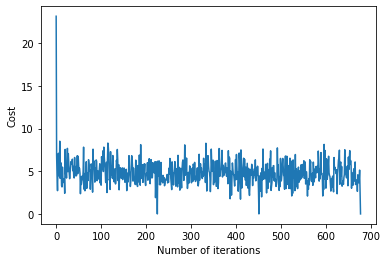

In [34]:
theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

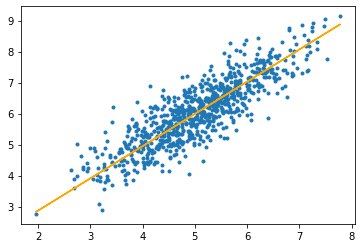

Mean absolute error =  0.4399107903160292


In [37]:
# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 
  
# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error) 

In [39]:
r = np.mean(y_pred)
r

6.022385134930012